Построение модели линейной регрессии с регуляризацией.

Данные по продажам домов. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Data Preparation

### Ознакомление с датасетом

In [228]:
df = pd.read_csv('data.csv')

In [229]:
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Разведочный анализ

Выведем описательные статистики для числовых признаков.

In [230]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


Построим матрицу корреляций числовых признаков. Удалим линейно-зависимые признаки из данных.

In [231]:
corr_matrix = df.corr()
corr_matrix

C:\Users\zayce\AppData\Local\Temp\ipykernel_17008\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


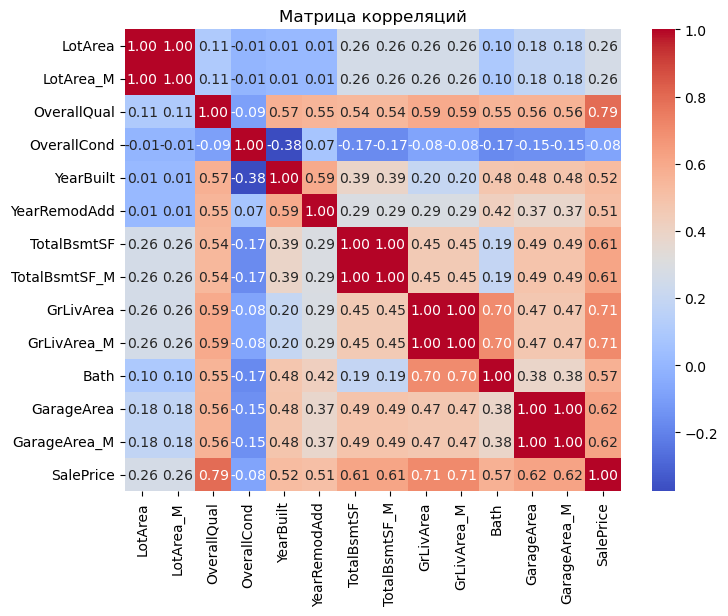

In [232]:
#Визуализация матрицы корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

In [233]:
df_prepared = df.copy()

In [234]:
threshold = 0.8 # Порог корреляции для удаления

#Находим пары признаков с высокой корреляцией
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
to_drop

{'GarageArea_M', 'GrLivArea_M', 'LotArea_M', 'TotalBsmtSF_M'}

In [235]:
df_prepared = df_prepared.drop(columns=to_drop)
df_prepared

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,DateSold,SaleCondition,SalePrice
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,1710,3,Gd,548,2/2008,Normal,208500
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,1262,2,TA,460,5/2007,Normal,181500
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,1786,3,Gd,608,9/2008,Normal,223500
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,1717,1,Gd,642,2/2006,Abnorml,140000
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,2198,3,Gd,836,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,GasA,Ex,Y,1647,3,TA,460,8/2007,Normal,175000
1456,13175,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,GasA,TA,Y,2073,2,TA,500,2/2010,Normal,210000
1457,9042,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,GasA,Ex,Y,2340,2,Gd,252,5/2010,Normal,266500
1458,9717,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,GasA,Gd,Y,1078,1,Gd,240,4/2010,Normal,142125


Посмотрим на индивидуальные графики зависимости целевой функции и отдельных переменных

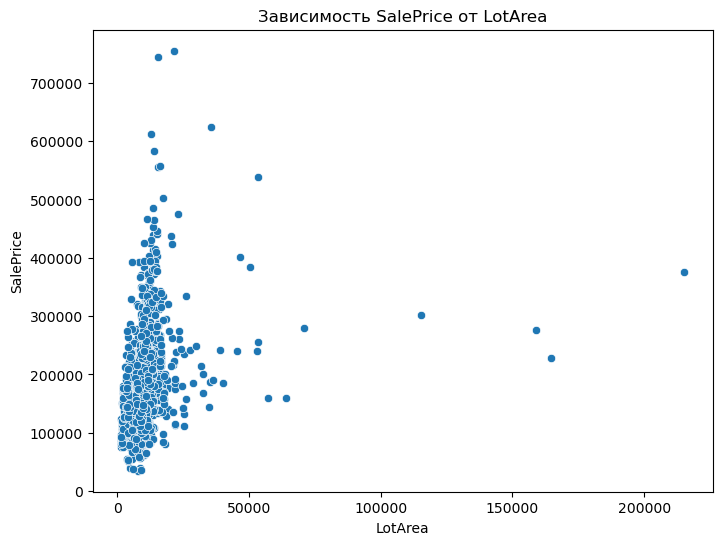

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

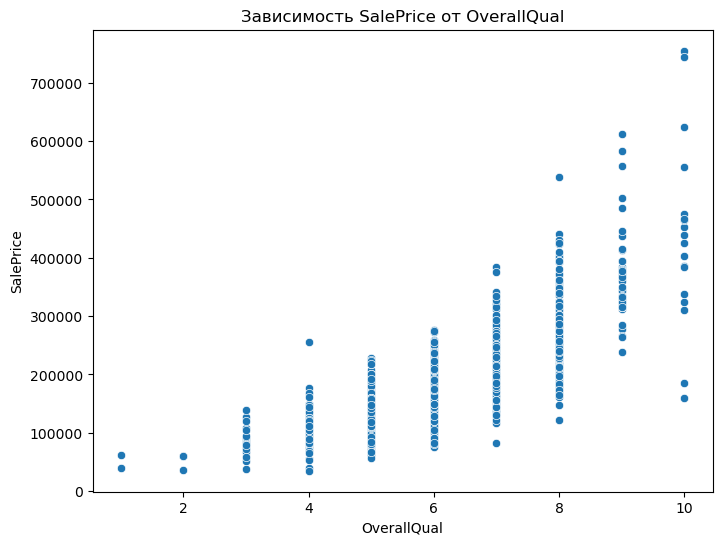

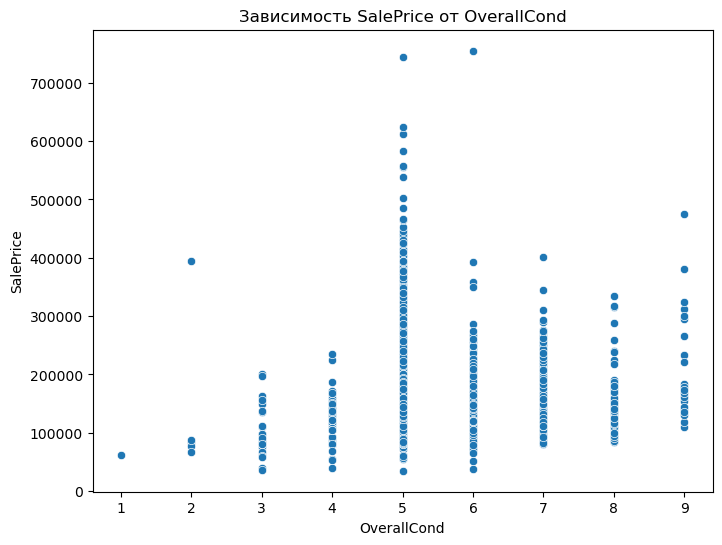

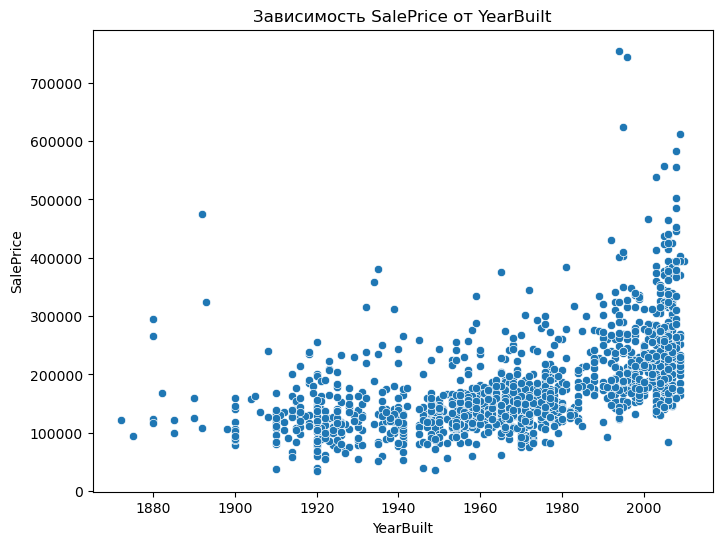

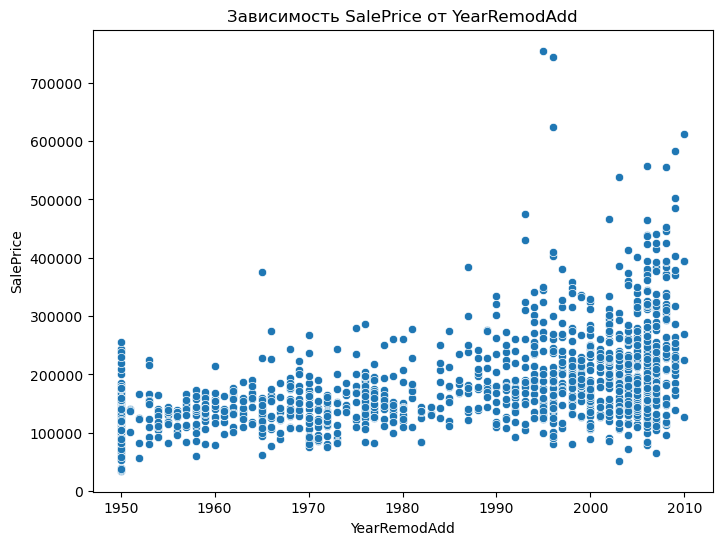

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

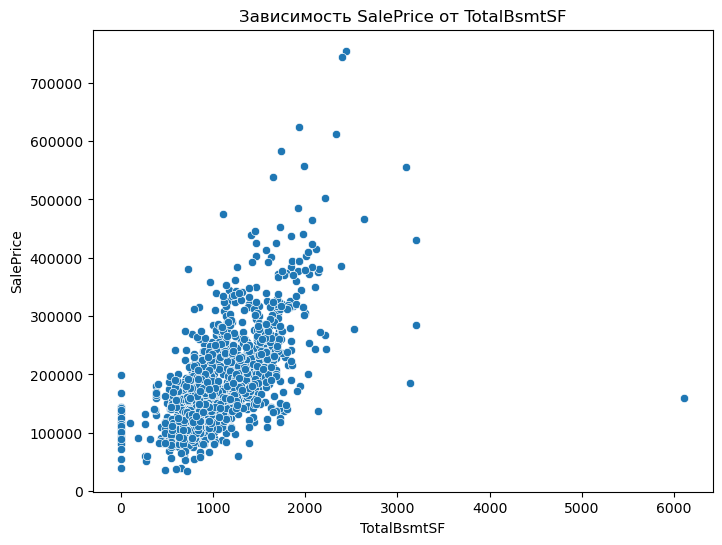

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

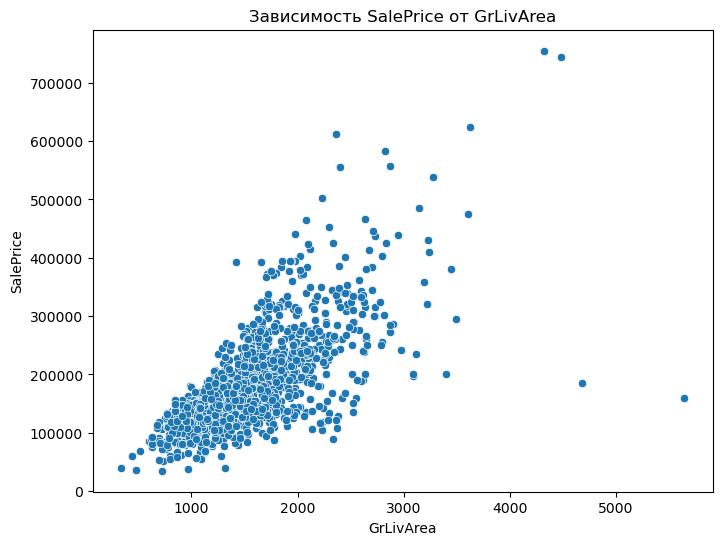

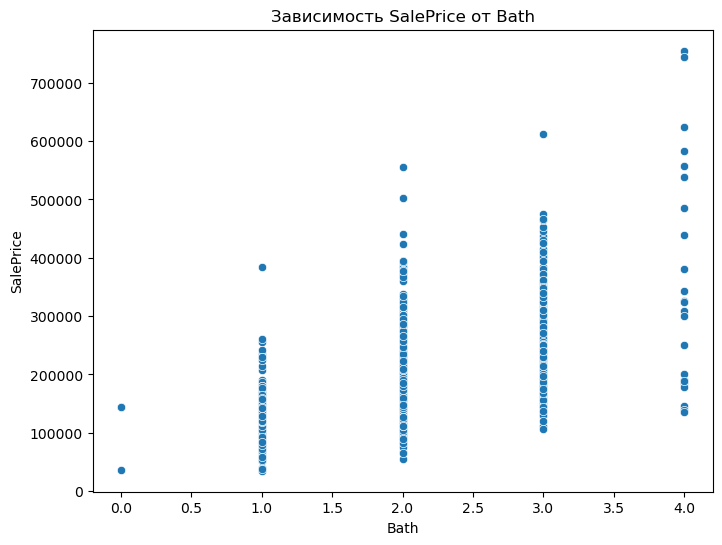

<Figure size 800x600 with 0 Axes>

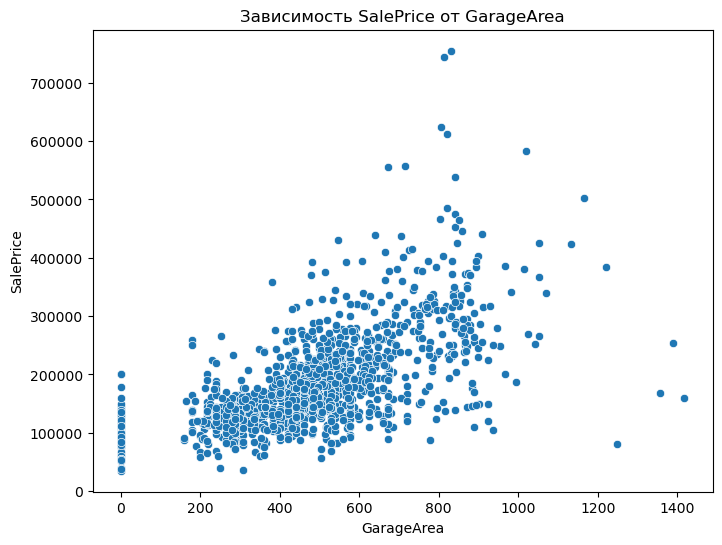

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [236]:
#Список всех столбцов, кроме целевой переменной
features = df_prepared.columns.drop('SalePrice')

for feature in features:
    plt.figure(figsize=(8, 6))  

    if pd.api.types.is_numeric_dtype(df_prepared[feature]):
        sns.scatterplot(x=df_prepared[feature], y=df_prepared['SalePrice'])
        plt.title(f'Зависимость SalePrice от {feature}')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
    
    plt.show()  

Между признаками LotArea, YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, GarageArea и целевой переменной наблюдается линейная зависимость. Видим выбросы в некоторых признаках

In [237]:
df_prepared = df_prepared.drop("DateSold", axis=1)

### Ознакомление с количеством пропущенных значений

In [238]:
print('Информация о выборке:\n')
df_prepared.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   Street         1460 non-null   object
 2   BldgType       1460 non-null   object
 3   OverallQual    1460 non-null   int64 
 4   OverallCond    1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YearRemodAdd   1460 non-null   int64 
 7   RoofStyle      1460 non-null   object
 8   ExterQual      1460 non-null   object
 9   ExterCond      1460 non-null   object
 10  Foundation     1460 non-null   object
 11  TotalBsmtSF    1460 non-null   int64 
 12  Heating        1460 non-null   object
 13  HeatingQC      1460 non-null   object
 14  CentralAir     1460 non-null   object
 15  GrLivArea      1460 non-null   int64 
 16  Bath           1460 non-null   int64 
 17  KitchenQual    1460 non-null   object
 18  Garag

## Нахождение аномалий и выбросов

Напишем функцию, вычисляющую границы, в которые должны попадать нормальные значения. Нижняя граница рассчитывается как разница между нижним квартилем и интерквартильным размахом, помноженным на 1,5, а верхняя — как сумма интерквартильного размаха и верхнего квартиля, умноженного на 1,5

In [239]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [240]:
numeric_columns = df_prepared.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Bath',
 'GarageArea',
 'SalePrice']

In [241]:
for each in numeric_columns:
    print(each)
    print(df_prepared[each].describe().apply(lambda x: f'{x:0.3f}'))

    boundaries = calculate_outliers(df_prepared[each])
    print(boundaries)
    
    print(' ')

LotArea
count      1460.000
mean      10516.828
std        9981.265
min        1300.000
25%        7553.500
50%        9478.500
75%       11601.500
max      215245.000
Name: LotArea, dtype: object
(1481.5, 17673.5)
 
OverallQual
count    1460.000
mean        6.099
std         1.383
min         1.000
25%         5.000
50%         6.000
75%         7.000
max        10.000
Name: OverallQual, dtype: object
(2.0, 10.0)
 
OverallCond
count    1460.000
mean        5.575
std         1.113
min         1.000
25%         5.000
50%         5.000
75%         6.000
max         9.000
Name: OverallCond, dtype: object
(3.5, 7.5)
 
YearBuilt
count    1460.000
mean     1971.268
std        30.203
min      1872.000
25%      1954.000
50%      1973.000
75%      2000.000
max      2010.000
Name: YearBuilt, dtype: object
(1885.0, 2069.0)
 
YearRemodAdd
count    1460.000
mean     1984.866
std        20.645
min      1950.000
25%      1967.000
50%      1994.000
75%      2004.000
max      2010.000
Name: YearRemodAd

Скорректируем выбросы 

LotArea

In [242]:
#Запишем в переменную is_outlier информацию о том, какие значения меньше нижней границы или больше верхней.
boundaries = calculate_outliers(df_prepared['LotArea'])
is_outlier = (df_prepared['LotArea'] < boundaries[0]) | (df_prepared['LotArea'] > boundaries[1])
print(is_outlier)
#Найдем процент выбросов 
is_outlier.sum()
print(is_outlier.sum() / len(df_prepared) * 100)
df_prepared[is_outlier]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotArea, Length: 1460, dtype: bool
4.726027397260274


,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice
53,50271,Pave,1Fam,9,5,1981,1987,Gable,Gd,TA,...,1842,GasA,Gd,Y,1842,1,Gd,894,Normal,385000
66,19900,Pave,1Fam,7,5,1970,1989,Gable,TA,TA,...,1947,GasA,TA,Y,2207,2,TA,576,Normal,180000
113,21000,Pave,1Fam,6,5,1953,1953,Hip,TA,Gd,...,1809,GasA,TA,Y,2259,2,Gd,450,Abnorml,217000
120,21453,Pave,1Fam,6,5,1969,1969,Flat,TA,TA,...,938,GasA,Ex,Y,988,1,TA,540,Normal,180000
159,19378,Pave,1Fam,7,5,2005,2006,Gable,Gd,TA,...,1392,GasA,Ex,Y,2462,3,Gd,576,Partial,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,57200,Pave,1Fam,5,5,1948,1950,Gable,TA,TA,...,747,GasA,TA,Y,1687,1,TA,572,Normal,160000
1409,20544,Pave,1Fam,7,6,1986,1991,Gable,TA,Gd,...,791,GasA,Gd,Y,2093,3,TA,542,Normal,215000
1423,19690,Pave,1Fam,6,7,1966,1966,Flat,Gd,Gd,...,697,GasA,TA,Y,2201,2,Gd,432,Alloca,274970
1430,21930,Pave,1Fam,5,5,2005,2005,Gable,Gd,TA,...,732,GasA,Ex,Y,1838,3,TA,372,Normal,192140


Минимальные значения совсем немного ниже рассчитанной нижней границы, поэтому заменим значения, превышающие верхнюю границу верхним граничным значением

In [243]:
is_outlier = (df_prepared['LotArea'] > boundaries[1])

In [244]:
df_prepared.loc[is_outlier, 'LotArea'] = int(boundaries[1])
df_prepared['LotArea'].describe()

count     1460.000000
mean      9647.237671
std       3594.597888
min       1300.000000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      17673.000000
Name: LotArea, dtype: float64

TotalBsmtSF

In [245]:
#Запишем в переменную is_outlier информацию о том, какие значения больше верхней границы, 
#так как в минимальных значениях есть нули, их заменять не будем, так как подвал может отсутствовать 
boundaries = calculate_outliers(df_prepared['TotalBsmtSF'])
is_outlier = (df_prepared['TotalBsmtSF'] > boundaries[1])
print(is_outlier)
#Найдем процент выбросов 
is_outlier.sum()
print(is_outlier.sum() / len(df_prepared) * 100)
df_prepared[is_outlier]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: TotalBsmtSF, Length: 1460, dtype: bool
1.643835616438356


,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice
70,13651,Pave,1Fam,7,6,1973,1973,Gable,TA,Gd,...,2223,GasA,Ex,Y,2223,2,TA,516,Normal,244000
178,17423,Pave,1Fam,9,5,2008,2009,Hip,Ex,TA,...,2216,GasA,Ex,Y,2234,2,Ex,1166,Partial,501837
224,13472,Pave,1Fam,10,5,2003,2003,Hip,Ex,TA,...,2392,GasA,Ex,Y,2392,2,Ex,968,Normal,386250
278,14450,Pave,1Fam,9,5,2006,2007,Gable,Ex,TA,...,2121,GasA,Ex,Y,2121,3,Ex,732,Partial,415298
313,17673,Pave,1Fam,7,5,1965,1965,Hip,TA,TA,...,2136,GasW,TA,Y,2036,2,TA,513,Normal,375000
332,10655,Pave,1Fam,8,5,2003,2004,Gable,Gd,TA,...,3206,GasA,Ex,Y,1629,2,Gd,880,Normal,284000
440,15431,Pave,1Fam,10,5,2008,2008,Hip,Ex,TA,...,3094,GasA,Ex,Y,2402,2,Ex,672,Normal,555000
477,13693,Pave,1Fam,9,5,2006,2006,Hip,Ex,TA,...,2153,GasA,Ex,Y,2643,3,Ex,694,Normal,380000
496,12692,Pave,1Fam,8,5,1992,1993,Hip,Gd,TA,...,3200,GasA,Ex,Y,3228,3,Gd,546,Normal,430000
523,17673,Pave,1Fam,10,5,2007,2008,Hip,Ex,TA,...,3138,GasA,Ex,Y,4676,4,Ex,884,Partial,184750


In [246]:
#Заменим значения, превышающие верхнюю границу верхним граничным значением
df_prepared.loc[is_outlier, 'TotalBsmtSF'] = int(boundaries[1])
df_prepared['TotalBsmtSF'].describe()

count    1460.000000
mean     1049.190411
std       400.681877
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      2052.000000
Name: TotalBsmtSF, dtype: float64

GrLivArea

In [247]:
#Запишем в переменную is_outlier информацию о том, какие значения больше верхней границы
boundaries = calculate_outliers(df_prepared['GrLivArea'])
is_outlier = (df_prepared['GrLivArea'] > boundaries[1])
print(is_outlier)
#Найдем процент выбросов 
is_outlier.sum()
print(is_outlier.sum() / len(df_prepared) * 100)
df_prepared[is_outlier]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GrLivArea, Length: 1460, dtype: bool
2.1232876712328768


,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice
58,13682,Pave,1Fam,10,5,2006,2006,Hip,Ex,TA,...,1410,GasA,Ex,Y,2945,4,Gd,641,Partial,438780
118,12376,Pave,1Fam,7,5,1990,1990,Hip,TA,TA,...,1673,GasA,Gd,Y,3222,3,Gd,594,Normal,320000
185,17673,Pave,1Fam,10,9,1892,1993,Gable,Gd,Gd,...,1107,GasA,Ex,Y,3608,3,Ex,840,Normal,475000
197,17673,Pave,1Fam,8,4,1918,1990,Gable,Gd,Gd,...,1360,GasA,Gd,Y,3112,2,Gd,795,Abnorml,235000
231,15138,Pave,1Fam,8,5,1995,1996,Gable,Gd,TA,...,1462,GasA,Ex,Y,2794,3,Ex,810,Normal,403000
304,17673,Pave,1Fam,7,9,1880,2002,Gable,TA,TA,...,1470,GasA,Ex,Y,3493,3,Gd,870,Normal,295000
324,11275,Pave,1Fam,7,7,1967,2007,Mansard,Gd,Gd,...,710,GasA,Ex,Y,2978,3,Gd,564,Normal,242000
496,12692,Pave,1Fam,8,5,1992,1993,Hip,Gd,TA,...,2052,GasA,Ex,Y,3228,3,Gd,546,Normal,430000
523,17673,Pave,1Fam,10,5,2007,2008,Hip,Ex,TA,...,2052,GasA,Ex,Y,4676,4,Ex,884,Partial,184750
583,13500,Pave,1Fam,10,9,1893,2000,Gable,Ex,Ex,...,1237,GasA,Gd,Y,2775,4,Gd,880,Normal,325000


In [248]:
#Заменим значения, превышающие верхнюю границу верхним граничным значением
df_prepared.loc[is_outlier, 'GrLivArea'] = int(boundaries[1])
df_prepared['GrLivArea'].describe()

count    1460.000000
mean     1503.722603
std       481.341334
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      2747.000000
Name: GrLivArea, dtype: float64

### Преобразование категориальных данных

Разделим данные на тренировочную и тестовую выборки.

In [249]:
X = df_prepared.drop(columns=["SalePrice"])
y = df_prepared["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Закодируем категориальные признаки в тренировочной и тестовой выборках.

In [250]:
categorical_columns = df_prepared.select_dtypes(include=['object', 'category', 'string']).columns
print("Категориальные колонки:", categorical_columns.tolist())

Категориальные колонки: ['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleCondition']


In [251]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

In [252]:
#Применение OneHotEncoding к тренировочной выборке
ohe.fit(X_train[categorical_columns]) 
X_train_encoded = ohe.transform(X_train[categorical_columns])

C:\Users\zayce\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [253]:
#Применение OneHotEncoder к тестовой выборке
X_test_encoded = ohe.transform(X_test[categorical_columns])

C:\Users\zayce\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [254]:
#Преобразование закодированных данных обратно в DataFrame
encoded_columns = ohe.get_feature_names_out(categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

In [255]:
#Удаление исходных категориальных столбцов и добавление закодированных
X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded_df)
X_test = X_test.drop(columns=categorical_columns).join(X_test_encoded_df)

In [256]:
X_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,Street_Pave,...,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,6120,5,7,1925,1950,768,1015,1,450,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
373,10634,5,6,1953,1953,608,1319,1,270,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20,14215,8,5,2005,2006,1158,2376,4,853,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
800,12798,6,5,1997,1997,616,1688,3,603,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
152,14803,6,5,1971,1971,825,1993,3,495,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,10800,6,7,1905,2000,482,1912,2,672,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1344,11103,7,5,2006,2006,728,1456,3,440,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
527,14948,9,5,2008,2008,1452,2713,3,858,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1149,9000,7,9,1920,1988,650,1482,1,324,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Стандартизация данных (Подготовим числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведем их к единому масштабу)

In [257]:
numeric_columns.remove('SalePrice')
numeric_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'Bath',
 'GarageArea']

In [258]:
target_column = 'SalePrice' 

In [259]:
#Стандартизируем все числовые признаки, кроме целевой переменной
std_scaler = StandardScaler()

In [260]:
X_train[numeric_columns] = std_scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = std_scaler.transform(X_test[numeric_columns])

In [261]:
#Стандартизируем целевую переменную 'SalePrice'
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

## Modelling

Обучим модель линейной регрессии без регуляризации. Посмотрим на веса полученной модели. Сделаем предсказания по обучающей и тестовой выборкам.

model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [262]:
X_test.index

Int64Index([ 854,  381,  816,  577,   35,  301,  688,  900, 1251,  860,
            ...
             512,  882,  786, 1435, 1447,  657,  411,  861, 1175, 1009],
           dtype='int64', length=438)

In [263]:
X_test = X_test.reset_index(drop=True) 
X_train = X_train.reset_index(drop=True)

In [264]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [265]:
mae = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
-mae.mean() 

0.2652151551093582

In [266]:
mse = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
-mse.mean()

0.20035494348036567

In [267]:
r2 = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=10)
r2.mean()

0.7965727690543891

In [268]:
rmse = cross_val_score(lin_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
-rmse.mean()

0.4365736128729445

In [269]:
# Предсказание на тестовых данных
y_pred = lin_reg.predict(X_test)

In [270]:
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
rmse_test

0.3806180044704532

In [271]:
#Вывод точности предсказания (r2)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8240207184167039
0.8394000301962115


In [272]:
test_mse = mean_squared_error(y_test, predict_test)
test_mse

0.14487006532706992

In [273]:
test_mae = mean_absolute_error(y_test, predict_test)
test_mae

0.2631793941310929

Преобразуем предсказания обратно в исходный масштаб

In [274]:
pred_original_scale = target_scaler.inverse_transform(predict_test.reshape(-1, 1))

#Преобразуем результат в одномерный массив
pred_original = pred_original_scale.flatten()

pred_original

array([196941.77000704, 204455.71700006, 122002.13391266, 153895.8978617 ,
       288351.2712957 , 287624.54428532, 238258.77728058, 100832.71764973,
       198665.88468927, 167480.96427536, 180185.91013323, 172053.62617814,
       251820.21133085, 100313.07251355, 178008.37955862, 168563.72360414,
       324189.57241338, 112024.5537095 , 205474.02097596, 206394.55081004,
       421955.71563358, 115349.50149098, 131074.31505514, 112233.72715745,
       245404.13411321, 165409.50900191, 170827.25398119,  94097.47183331,
       151436.71833009, 217738.64135947, 111401.12812669, 160790.27386657,
       132455.26419204, 134077.84821012, 151442.50644439,  39696.6990615 ,
       156926.03176432, 213211.42162909, 298436.56981811, 141523.45858375,
       224573.57514636, 125253.91875412, 112042.97974093, 175502.21592315,
       219223.29270284, 226937.76863053, 262701.50936856, 133442.34886319,
       107526.21648181, 157694.19774056, 192644.02970495,   1675.64814309,
       177166.21108541, 1

Применим L1-регуляризацию (Lasso). Сделаем предсказания по обучающей и тестовой выборкам, замерим качество с помощью MAE, MSE, $R^2$. 

In [275]:
lasso_regression = Lasso(alpha=0.1, random_state=42) 
lasso_regression.fit(x_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [276]:
# вывод точности предсказания
print(lasso_regression.score(x_train, y_train))
print(lasso_regression.score(x_test, y_test))

0.7606525409922155
0.7922123977656884


In [277]:
#Подберем параметр регуляризации
coef = []
for i in range(-4, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) 

  # обучение
  lasso_regression.fit(x_train, y_train)

  coef.append(list(lasso_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(x_train, y_train))
  print(lasso_regression.score(x_test, y_test))

----- lambda = 0.0001 -----
0.8238067393559689
0.8411914423240981
----- lambda = 0.001 -----
0.8213981784331649
0.8480267863055858
----- lambda = 0.01 -----
0.801720384797834
0.831715207928493
----- lambda = 0.1 -----
0.7606525409922155
0.7922123977656884
----- lambda = 1 -----
0.0
-0.0025150759221861385
----- lambda = 10 -----
0.0
-0.0025150759221861385
----- lambda = 100 -----
0.0
-0.0025150759221861385
----- lambda = 1000 -----
0.0
-0.0025150759221861385
----- lambda = 10000 -----
0.0
-0.0025150759221861385


In [278]:
coef = pd.DataFrame(coef, columns=x_train.columns)
coef

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,Street_Pave,...,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.101056,0.229724,0.094133,0.107920,0.014958,0.177974,0.316016,0.015967,0.056972,0.107371,...,-0.042073,0.000315,-0.479499,-0.473498,-0.490451,0.0,0.354675,-0.195830,0.068635,0.123579
1,0.104926,0.234257,0.094584,0.131321,0.015627,0.173325,0.312689,0.012937,0.060605,0.000000,...,-0.031146,0.004964,-0.430371,-0.459303,-0.467247,0.0,0.086944,-0.169989,0.041961,0.100719
2,0.106024,0.308172,0.076068,0.134568,0.044648,0.166812,0.306085,0.000000,0.070907,0.000000,...,-0.004389,0.000000,-0.000000,-0.193745,-0.162771,0.0,0.000000,-0.000000,-0.000000,0.027877
3,0.053627,0.366523,0.000000,0.038144,0.031502,0.150445,0.254409,0.000000,0.064695,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000
4,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000
5,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000
6,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000
7,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000
8,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,0.000000


In [279]:
lasso_regression = Lasso(alpha=0.001, random_state=42) # alpha — величина регуляризации
lasso_regression.fit(x_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [280]:
y_pred = lasso_regression.predict(x_test)

In [281]:
pred_original_scale = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

#Преобразуем результат в одномерный массив
pred_original = pred_original_scale.flatten()

pred_original

array([198284.32769933, 205311.7445136 , 121089.74477746, 154934.19056137,
       288332.67679823, 287849.08806862, 239109.95000644, 101261.66566201,
       197413.31467359, 167071.89086424, 181175.40493441, 172118.06149331,
       253071.40234255,  99670.79584545, 178873.98421565, 166830.21346072,
       323653.31270954, 119815.13223237, 208654.94779801, 207210.71450347,
       413863.93943051, 112941.82961466, 130591.25134527, 108269.00550352,
       244440.44460822, 165987.33770399, 171627.98020022,  89948.47596392,
       149559.56113061, 217827.43141555, 108630.86703526, 160411.96408568,
       131728.69184402, 132145.74945809, 153916.57439548,  42759.96454317,
       155070.57059424, 215179.23459814, 298996.27566959, 141669.08977776,
       224873.91272792, 119558.34133437, 115094.20137054, 175673.15704864,
       219375.22902122, 225077.50522815, 261383.81025468, 134764.27633741,
       107904.90834646, 157957.59669841, 193523.34045179,    721.00735102,
       177450.04464742, 1

In [282]:
# вывод точности предсказания
print(lasso_regression.score(x_train, y_train))
print(lasso_regression.score(x_test, y_test))

0.8213981784331649
0.8480267863055858


In [283]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {test_mse}")
print(f"mae: {test_mae}")
print(f"r2: {r2_test}")

Среднеквадратичная ошибка (MSE): 0.13708825364520819
mae: 0.25259385821936714
r2: 0.8480267863055858


Применим L2-регуляризацию (Ridge). Сделаем предсказания по обучающей и тестовой выборкам, замерим качество с помощью MAE, MSE, $R^2$. 

In [284]:
ridge_regression = Ridge(alpha=0.1, random_state=42)  # alpha — величина регуляризации
ridge_regression.fit(x_train, y_train)

Ridge(alpha=0.1, random_state=42)

In [285]:
# вывод точности предсказания
print(ridge_regression.score(x_train, y_train))
print(ridge_regression.score(x_test, y_test))

0.8239813045090479
0.8403339358259776


In [286]:
# коэффициенты модели
print('w_0:', ridge_regression.intercept_)
print('w_i:', ridge_regression.coef_)

w_0: 0.5811792351128823
w_i: [ 0.1019605   0.23018353  0.09575914  0.10768333  0.01430575  0.17898777
  0.31623091  0.01630135  0.05681702  0.16734845 -0.0895327  -0.32570632
 -0.01560313  0.01468498  0.09647773  0.05208357  0.15275597  0.18251734
  0.0544905  -0.6157376  -0.31088618 -0.36761581  0.12751744  0.07788217
  0.33197786  0.09403308  0.0620126   0.13172013  0.38820091 -0.24759548
 -0.06951939 -0.29286394 -0.29314446 -0.28601798 -0.80750255  0.09618124
 -0.05338062 -0.05418164 -0.04454424  0.00134793 -0.48024104 -0.47210174
 -0.49009585  0.07466834  0.38963333 -0.19818664  0.07140595  0.12626861]


In [287]:
#Подберем параметр регуляризации
coef = []
for i in range(-7, -1):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  

  # обучение
  ridge_regression.fit(x_train, y_train)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(x_train, y_train))
  print(ridge_regression.score(x_test, y_test))

----- lambda = 1e-07 -----
0.8240207184167038
0.8394000313641907
----- lambda = 1e-06 -----
0.8240207184166952
0.8394000418759597
----- lambda = 1e-05 -----
0.8240207184158368
0.8394001469904798
----- lambda = 0.0001 -----
0.8240207183300726
0.8394011978187571
----- lambda = 0.001 -----
0.8240207098335286
0.8394116745820256
----- lambda = 0.01 -----
0.8240199338478988
0.8395134531456545


In [288]:
y_pred = ridge_regression.predict(x_test)

In [289]:
pred_original_scale = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

#Преобразуем результат в одномерный массив
pred_original = pred_original_scale.flatten()

pred_original

array([196947.72850801, 204459.88562662, 122008.55455576, 153913.71544783,
       288346.43249994, 287624.45574195, 238254.0892842 , 100863.74093851,
       198656.26753957, 167442.5271702 , 180194.80312687, 172050.76249444,
       251813.9762298 , 100308.54825425, 178011.7465057 , 168576.43634187,
       324167.12648082, 112046.25671927, 205465.53534519, 206395.56206563,
       421904.28333051, 115350.10704956, 131100.79268641, 112241.38326833,
       245405.77649988, 165428.72918784, 170768.55215674,  94054.4233818 ,
       151402.80311179, 217741.04143117, 111396.56756899, 160794.08635963,
       132479.22550782, 134073.27270548, 151427.32753851,  39894.48567652,
       156913.02230069, 213218.75853432, 298449.12306435, 141542.74104415,
       224571.53716265, 125236.45679055, 112010.01262257, 175512.40536769,
       219219.04941197, 226929.16395822, 262688.38135779, 133441.61460379,
       107526.32220279, 157716.57386376, 192659.2998608 ,   1722.35134501,
       177169.78435455, 1

In [290]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {test_mse}")
print(f"mae: {test_mae}")
print(f"r2: {r2_test}")

Среднеквадратичная ошибка (MSE): 0.14476775154634206
mae: 0.2630469913028936
r2: 0.8395134531456545


Согласно метрике RMSE ошибка является умеренной, необходима доработка текущей модели или применение других моделей